In [2]:
#%matplotlib inline
import csv
import os
import matplotlib
import numpy as np

import matplotlib.pyplot as pyplot
import matplotlib.patches as mpatches

file_dir = os.path.join(os.getcwd(), "report.csv")

first = 0
counter = 0
true = []
pred = []
CER = []
CER_norm = []
WER = []

total_CER = []
total_WER = []

with open(file_dir, 'r') as f:
    reader = csv.reader(f)
    for row in reader:
        if first == 0:
            first = 1
            continue

        if len(row) == 1:
            counter = 0
            continue

        if counter == 32:
            total_CER.append(row[1])
            total_WER.append(row[2])

        if len(row) == 5:
            true.append(row[0])
            pred.append(row[1])
            CER.append(row[2])
            CER_norm.append(row[3])
            WER.append(row[4])
            counter = counter +1

CER_np = np.asarray(total_CER)
WER_np = np.asarray(total_WER)
time = np.asarray(range(len(total_CER)))

CER_np = CER_np.astype(float)
WER_np = WER_np.astype(float)

print("Prepared Data")

Prepared Data


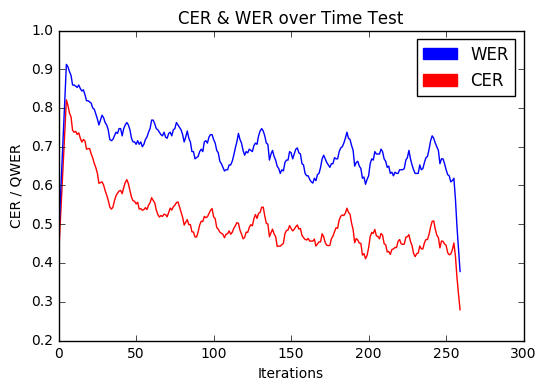

Done


In [3]:
from scipy.signal import savgol_filter
from scipy.interpolate import interp1d
from scipy.signal import savgol_filter

def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

window_size = 10

# yhat = savgol_filter(CER_np, 51, 3)

#  Cost / Acc over time\n",
#pyplot.plot(range(len(CER_np)), CER_np, 'r', range(len(WER_np)), WER_np, 'b')
pyplot.plot(time, smooth(CER_np, window_size), 'r')
pyplot.plot(time, smooth(WER_np, window_size), 'b')
#  legend\n",
red_patch = mpatches.Patch(color='red', label='CER')
blue_patch = mpatches.Patch(color='blue', label='WER')
pyplot.legend(handles=[blue_patch, red_patch])
#  Title and axis\n",
pyplot.title('CER & WER over Time Test')
pyplot.xlabel('Iterations')
pyplot.ylabel('CER / QWER')
pyplot.show()

print("Done")